In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

We will by trying to determine which ML model is best to determine alcohol level from the features given.

In [4]:
db = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
db.head()
db.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
corr = db.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


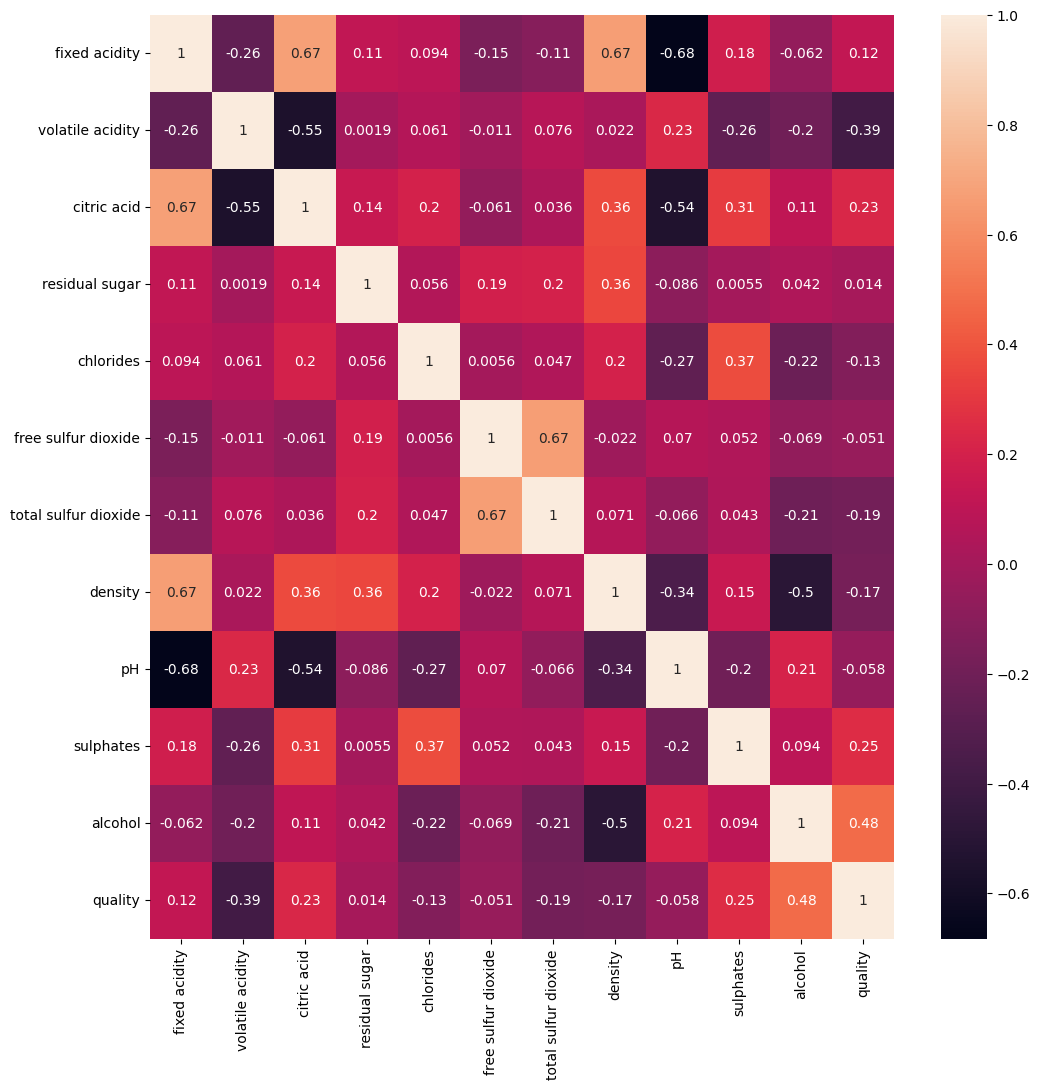

In [6]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True)
plt.show()

In [8]:
# Drops any columns with correlation under an absolute value of 0.1
db = db.drop(columns = ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'sulphates'])
db

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,alcohol,quality
0,0.700,0.00,0.076,34.0,0.99780,3.51,9.4,5
1,0.880,0.00,0.098,67.0,0.99680,3.20,9.8,5
2,0.760,0.04,0.092,54.0,0.99700,3.26,9.8,5
3,0.280,0.56,0.075,60.0,0.99800,3.16,9.8,6
4,0.700,0.00,0.076,34.0,0.99780,3.51,9.4,5
...,...,...,...,...,...,...,...,...
1594,0.600,0.08,0.090,44.0,0.99490,3.45,10.5,5
1595,0.550,0.10,0.062,51.0,0.99512,3.52,11.2,6
1596,0.510,0.13,0.076,40.0,0.99574,3.42,11.0,6
1597,0.645,0.12,0.075,44.0,0.99547,3.57,10.2,5


In [16]:
from sklearn.model_selection import train_test_split
y_train = db['alcohol']
X_train = db.drop(columns = ['alcohol'])


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

# Trains 3 different models to model the data
model1 = DecisionTreeRegressor(criterion = 'absolute_error')
model2 = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error')
model3 = XGBRegressor(eval_metric = "mae", max_depth = 9, n_estimators = 7, learning_rate = 0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=7, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
print(model1.score(X_val, y_val))
print(model2.score(X_val, y_val))
print(model3.score(X_val, y_val))

0.47604121150273293
0.6608722324844942
0.45024222023636107


We have decided that a random forest model is best used for regression analysis of this dataset and can properly predict the alcohol